In [1]:
import numpy as np
import seaborn as sns
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [3]:
learned_graphs = np.load('./Outputs/snr_learned_graph.npy')
ground_truth_adj = np.array(loadmat('./Dataset/Adj.mat')['A_Ground'])
flattened_adj = ground_truth_adj.flatten()

print(learned_graphs.shape)

(61000, 20, 20)


In [4]:
SNR_list = np.arange(0.0, 61.0, 5.0)

n_snr = len(SNR_list)

sensing_ratio = (100 * np.array([0.10])).astype("int")

epochs = 20
n_data = 10
n_pts = epochs * n_data

In [5]:
def laplacian_to_adj(laplacian, threshold):
    adjacency = -(laplacian - (np.eye(ground_truth_adj.shape[0]) * laplacian))
    tmp_adj = np.sign(adjacency - threshold)
    tmp_adj[tmp_adj < 0] = 0.0
    return tmp_adj

In [6]:
learned_lap_graphs = []

for n_snr, snr in enumerate(SNR_list):
    all_graphs = learned_graphs[n_snr * n_pts : (n_snr + 1) * n_pts, : , :]
    graphs = all_graphs[-n_data : , : , :]
    learned_lap_graphs.append(graphs)

learned_lap_graphs = np.array(learned_lap_graphs)
f1_scores = []

for n_snr, snr in enumerate(SNR_list):
    graph_laplacians = learned_lap_graphs[n_snr, :, :, :]
    avg_graph = np.sum(graph_laplacians, axis = 0) / graph_laplacians.shape[0]
    
    avg_graph_adj = laplacian_to_adj(avg_graph, 0.0)
    
    print("Diagonal of laplacian:\n", np.sum(avg_graph_adj, axis = 1), "\n\n")
    
    f1_scores.append(f1_score(flattened_adj, avg_graph_adj.flatten()))
    
print(f1_scores)

Diagonal of laplacian:
 [ 7. 11.  9.  8. 16. 11.  9. 15. 14. 10. 11. 10.  8. 10.  8. 14. 16. 14.
  8.  9.] 


Diagonal of laplacian:
 [ 8. 12.  9.  9. 18. 12.  8. 16. 15. 10. 11.  9.  9. 10.  8. 14. 15. 15.
  9.  9.] 


Diagonal of laplacian:
 [ 7.  7.  9.  9. 14. 12.  5. 11. 13.  8. 10.  9.  8.  8.  8. 12. 15. 14.
  8.  7.] 


Diagonal of laplacian:
 [ 6. 12. 10.  9. 16. 10.  5. 11. 12. 10. 10.  9.  7. 10.  8. 13. 15. 13.
  8.  8.] 


Diagonal of laplacian:
 [ 6.  8.  9.  8. 15. 12.  4. 11. 10.  8.  8.  8.  7.  9.  7. 12. 15. 13.
  9.  7.] 


Diagonal of laplacian:
 [ 6.  9.  7.  9. 11. 11.  5. 11. 13.  9.  9.  7.  8.  8.  7. 12. 13. 11.
  8.  8.] 


Diagonal of laplacian:
 [ 6. 10.  7.  7. 13. 11.  4.  9. 10.  8.  8.  6.  8.  8.  7. 13. 10. 11.
  7.  7.] 


Diagonal of laplacian:
 [ 5.  9.  7.  6. 11.  9.  3.  8.  8.  7.  7.  7.  8.  8.  6. 11. 12. 10.
  5.  7.] 


Diagonal of laplacian:
 [ 5.  8.  7.  5.  9.  9.  3.  8.  8.  6.  7.  7.  6.  6.  7.  9. 12. 11.
  4.  7.] 


Diagonal o

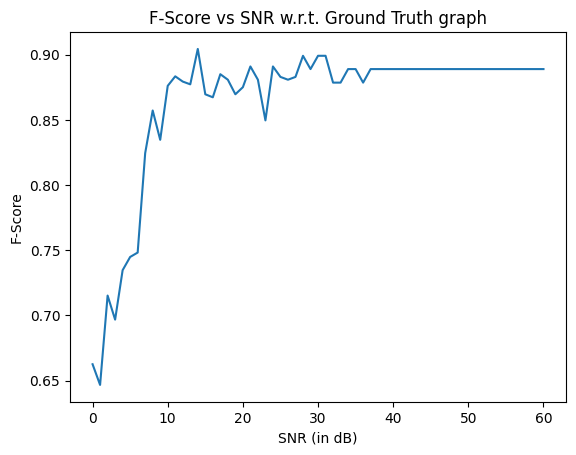

In [8]:
plt.plot(SNR_list, f1_scores)
plt.title("F-Score vs SNR w.r.t. Ground Truth graph")
plt.xlabel("SNR (in dB)")
plt.ylabel("F-Score")
plt.savefig("f_score_vs_snr.pdf")
plt.show()